In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np 

In [3]:
df_train = pd.read_csv('train_passengers.csv')
df_train.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [4]:
df_train['Satisfaction'].value_counts()

Satisfaction
Satisfied                  51914
Neutral or Dissatisfied    33053
Name: count, dtype: int64

In [5]:
df_train_2 = df_train.loc[df_train['Satisfaction'] == 'Neutral or Dissatisfied']

In [6]:
df_train_1 = df_train.loc[df_train['Satisfaction'] == 'Satisfied']
df_train_1.shape

(51914, 24)

In [7]:
df_train_1 = df_train_1.sample(n = df_train_2.shape[0])

In [8]:
# df_train_1 = df_train_1.drop(df_train_1.index[range(19000)])

In [9]:
df_train_1['Satisfaction'].value_counts()

Satisfaction
Satisfied    33053
Name: count, dtype: int64

In [10]:
df_train = pd.concat([df_train_1, df_train_2], axis = 0)

In [11]:
df_train['Satisfaction'].value_counts()

Satisfaction
Satisfied                  33053
Neutral or Dissatisfied    33053
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66106 entries, 42237 to 84964
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      66106 non-null  int64  
 1   Gender                                  66106 non-null  object 
 2   Age                                     66106 non-null  int64  
 3   Customer Type                           66106 non-null  object 
 4   Type of Travel                          66106 non-null  object 
 5   Class                                   66106 non-null  object 
 6   Flight Distance                         66106 non-null  int64  
 7   Departure Delay                         66106 non-null  int64  
 8   Arrival Delay                           65911 non-null  float64
 9   Departure and Arrival Time Convenience  66106 non-null  int64  
 10  Ease of Online Booking                  66106 non-null  int

In [14]:
df_train['Arrival Delay'].fillna(0, inplace = True)
df_train['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)
df_train['Customer Type'].replace({'Returning' : 1, 'First-time': 0}, inplace = True)
df_train['Type of Travel'].replace({'Business' : 1, 'Personal' : 0}, inplace=True)
df_train['Class'].replace({'Business' : 2, 'Economy' : 0, 'Economy Plus' : 1 }, inplace=True)

Satisfaction = LabelEncoder()
Satisfaction.fit(df_train['Satisfaction'])

Y_train = Satisfaction.transform(df_train['Satisfaction'])
Y_train = pd.Series(Y_train)


C:\Users\user\AppData\Local\Temp\ipykernel_20400\3415484303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Arrival Delay'].fillna(0, inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_20400\3415484303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [17]:
df_train['Satisfaction'] = Satisfaction.transform(df_train['Satisfaction'])

<Axes: >

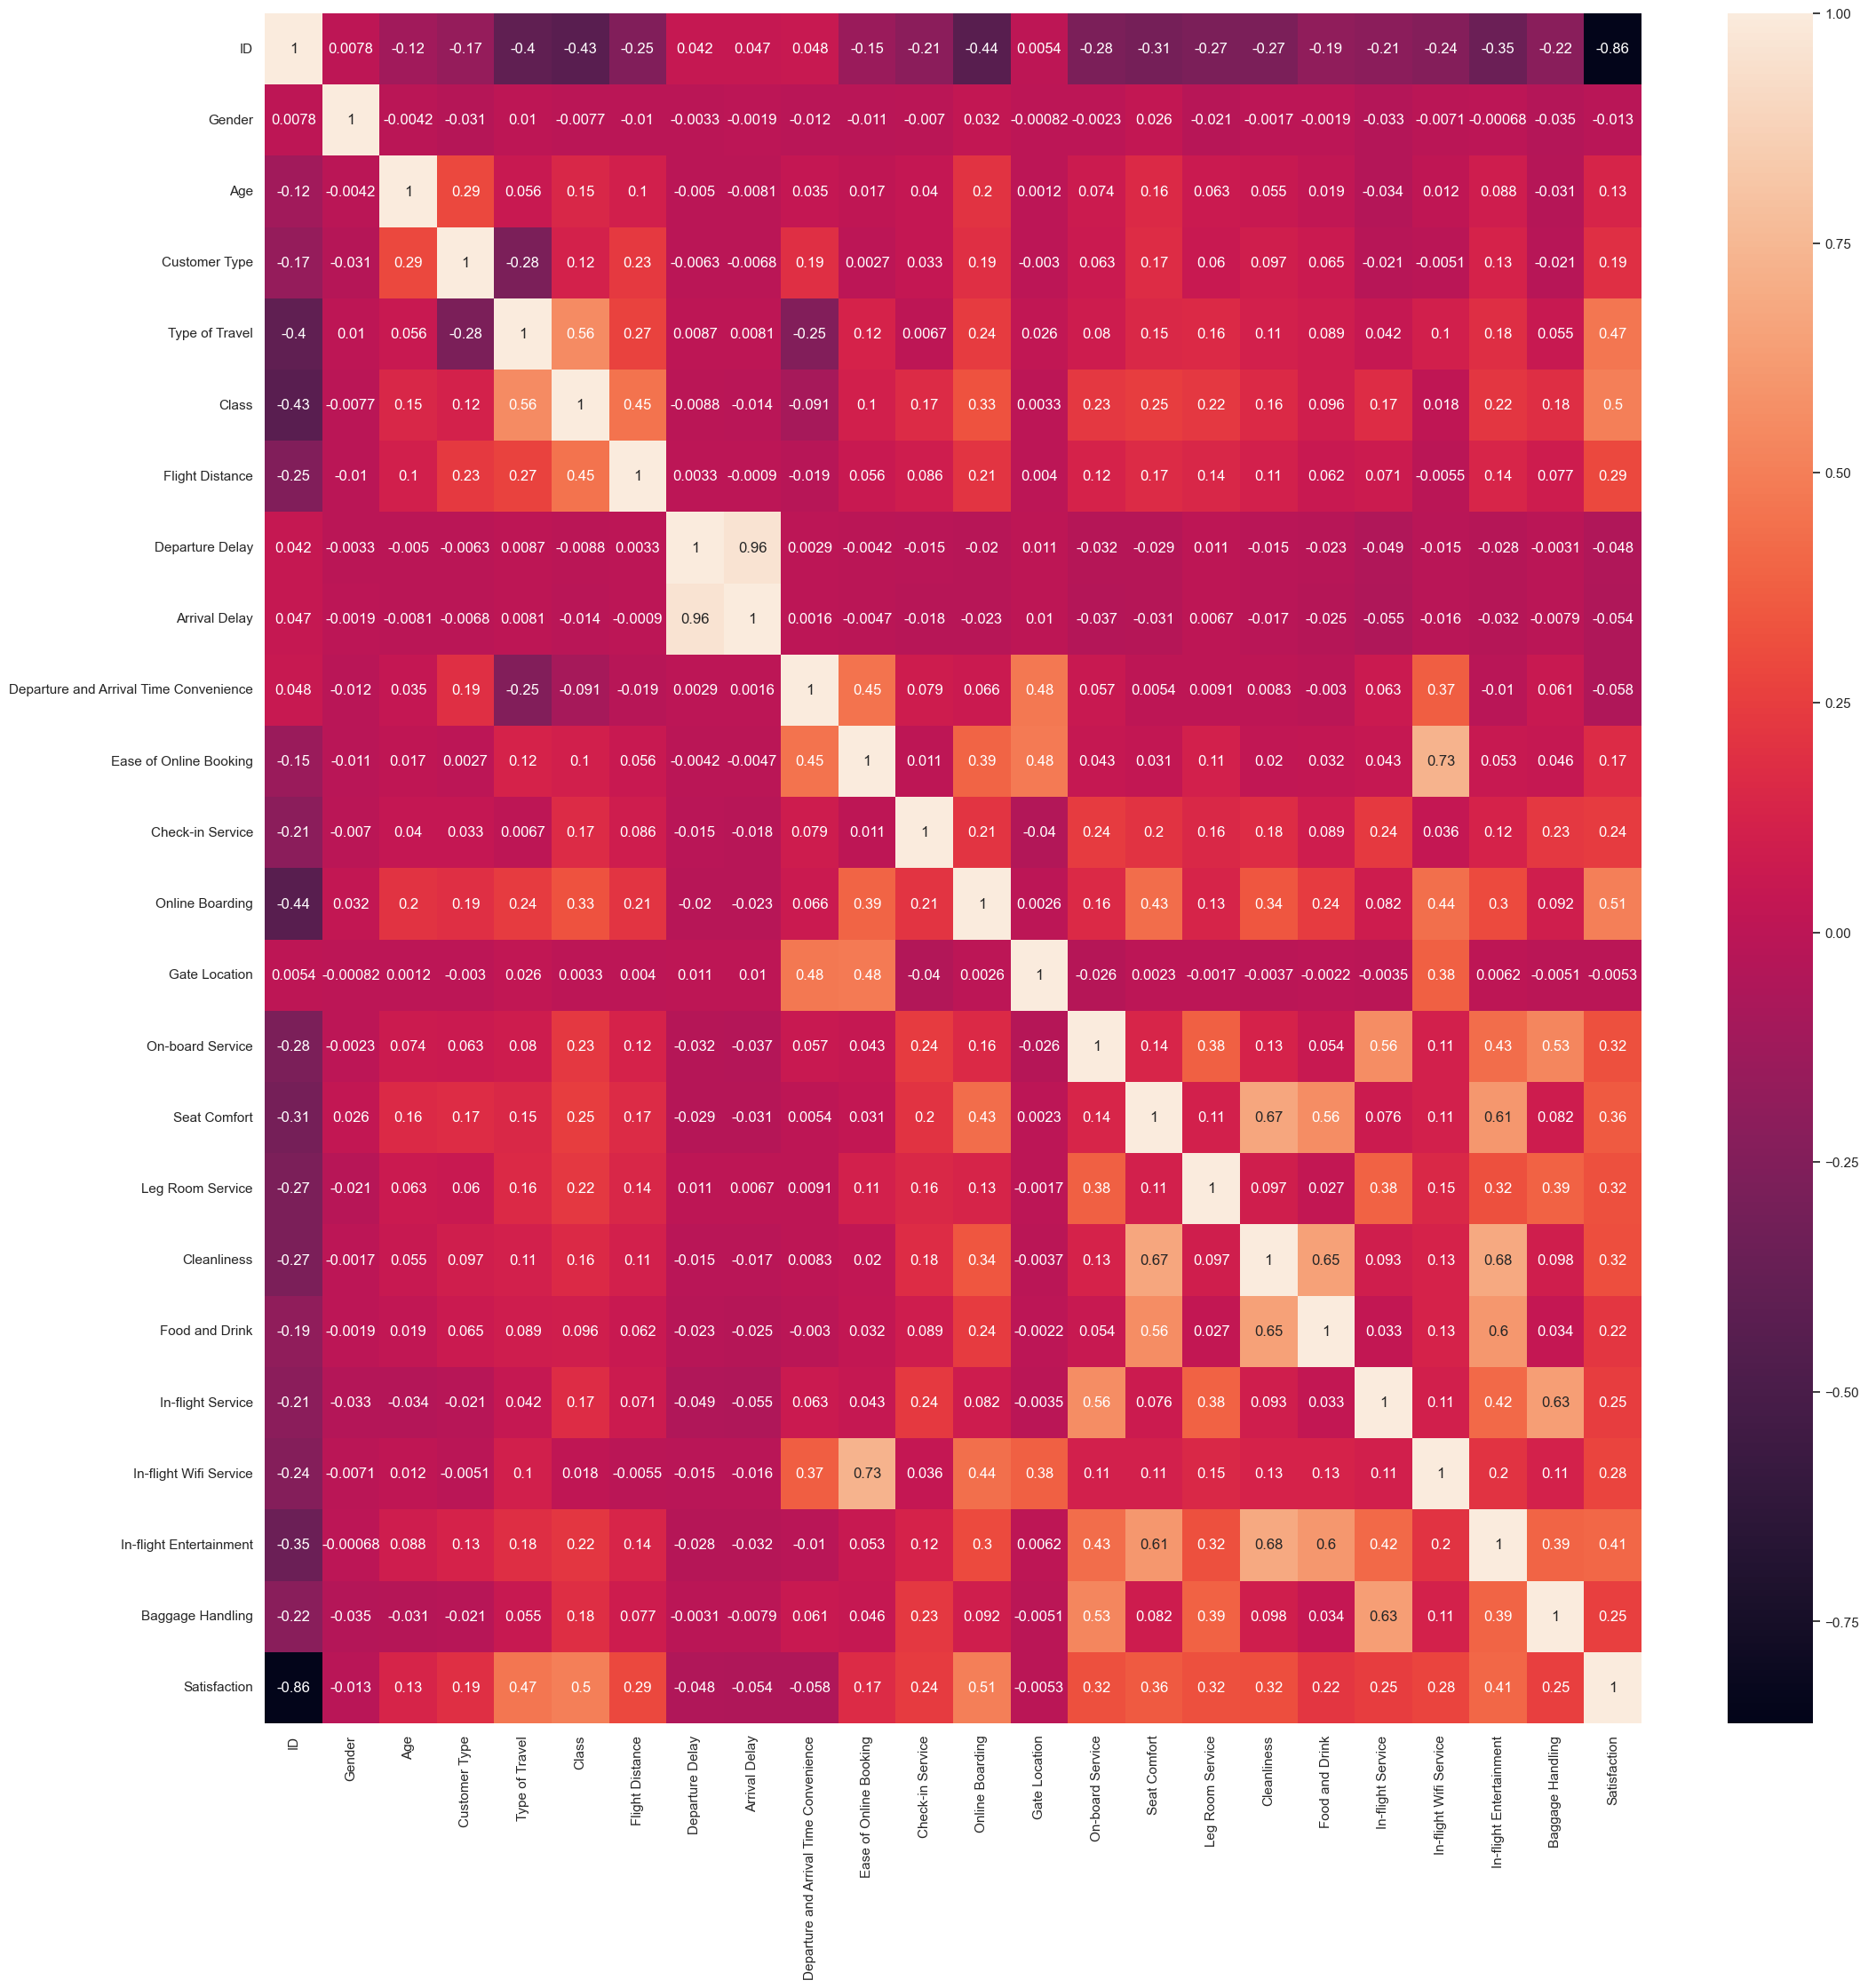

In [19]:
import seaborn as sns
corr_1 = df_train.corr()
sns.set_theme(rc={'figure.figsize':(25,25)})
sns.heatmap(corr_1,
            xticklabels=corr_1.columns.values,
            yticklabels=corr_1.columns.values, annot=True)

In [36]:
X_train = df_train.drop(['ID', 'Satisfaction'], axis=1)


In [37]:

service_columns = [
'Check-in Service',
'Online Boarding',
'On-board Service',
'Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling']

X_train['Mean Service Score'] = X_train[service_columns].mean(axis=1)


In [38]:
X_train = X_train.drop(['Departure and Arrival Time Convenience',
'Gender',
'Age',
'Customer Type',
'Departure Delay',
'Arrival Delay',
'Ease of Online Booking',
'Check-in Service',
'Online Boarding',
'Gate Location',
'On-board Service',
'Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling', 
'Flight Distance'], axis = 1)

In [39]:
# X_train['Delay Ratio'] = X_train['Departure Delay'] / (X_train['Arrival Delay'] + 1)
# X_train = X_train.drop(['Departure Delay', 'Arrival Delay'], axis = 1)

In [40]:
X_train.head()

,Type of Travel,Class,Mean Service Score
42237,1,0,3.272727
75798,1,2,3.545455
75231,1,0,1.818182
66545,1,2,3.272727
10999,1,2,3.454545


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = MinMaxScaler()

X_train_std = std.fit_transform(X_train)

X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train_std.head()

,Type of Travel,Class,Mean Service Score
0,1.0,0.0,0.568182
1,1.0,1.0,0.636364
2,1.0,0.0,0.204545
3,1.0,1.0,0.568182
4,1.0,1.0,0.613636


In [42]:
X_train = X_train_std


<Axes: >

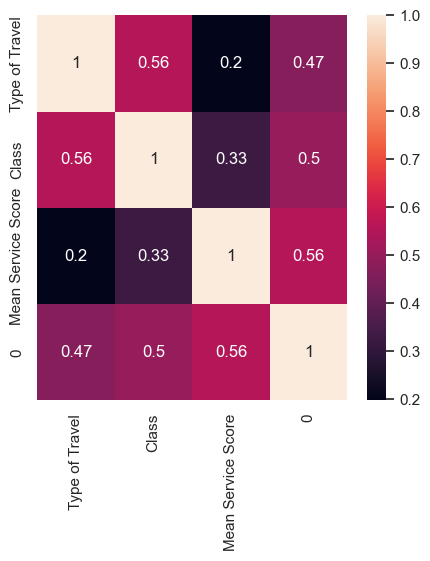

In [45]:
tablichka = pd.concat([X_train, Y_train], axis =1)
import seaborn as sns
corr = tablichka.corr()
sns.set_theme(rc={'figure.figsize':(5,5)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#### тут проверяем модельки

In [50]:
# log_reg_err = LogisticRegression()
# LDA_err = LinearDiscriminantAnalysis()
# KNC_err = KNeighborsClassifier()
# GNB_err = GaussianNB()
# DTC_err = DecisionTreeClassifier()
# SVC_err = SVC()

In [51]:
# from sklearn.metrics import f1_score

In [52]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [53]:
# log_reg_err.fit(x_train, y_train) 
# LDA_err.fit(x_train, y_train)
# KNC_err.fit(x_train, y_train) 
# GNB_err.fit(x_train, y_train)
# DTC_err.fit(x_train, y_train) 
# SVC_err.fit(x_train, y_train)

In [54]:
# log_reg_err_prediction = log_reg_err.predict(x_test) 
# LDA_err_prediction = LDA_err.predict(x_test)
# KNC_err_prediction = KNC_err.predict(x_test) 
# GNB_err_prediction = GNB_err.predict(x_test)
# DTC_err_prediction = DTC_err.predict(x_test) 
# SVC_err_prediction = SVC_err.predict(x_test)

In [55]:
# print(f1_score(y_test, log_reg_err_prediction, average='micro'))
# print(f1_score(y_test, LDA_err_prediction, average='micro'))
# print(f1_score(y_test, KNC_err_prediction, average='micro'))
# print(f1_score(y_test, GNB_err_prediction, average='micro'))
# print(f1_score(y_test, DTC_err_prediction, average='micro'))
# print(f1_score(y_test, SVC_err_prediction, average='micro'))

## обрабатываем тест данные так же как трэйн

In [47]:
df_test = pd.read_csv('test_passengers.csv')
df_test.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      44913 non-null  int64  
 1   Gender                                  44913 non-null  object 
 2   Age                                     44913 non-null  int64  
 3   Customer Type                           44913 non-null  object 
 4   Type of Travel                          44913 non-null  object 
 5   Class                                   44913 non-null  object 
 6   Flight Distance                         44913 non-null  int64  
 7   Departure Delay                         44913 non-null  int64  
 8   Arrival Delay                           44782 non-null  float64
 9   Departure and Arrival Time Convenience  44913 non-null  int64  
 10  Ease of Online Booking                  44913 non-null  in

In [50]:
df_test['Arrival Delay'].fillna(0, inplace = True)
df_test['Gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)
df_test['Customer Type'].replace({'Returning' : 1, 'First-time': 0}, inplace = True)
df_test['Type of Travel'].replace({'Business' : 1, 'Personal' : 0}, inplace=True)
df_test['Class'].replace({'Business' : 2, 'Economy' : 0, 'Economy Plus' : 1 }, inplace=True)

X_test = df_test.drop(['ID'], axis=1)
service_columns = ['Check-in Service',
'Online Boarding',
'On-board Service',
'Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling']

X_test['Mean Service Score'] = X_test[service_columns].mean(axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_20400\3673288654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Arrival Delay'].fillna(0, inplace = True)


In [51]:
X_test = X_test.drop([ 'Flight Distance',
'Departure and Arrival Time Convenience',
'Gender',
'Age',
'Customer Type',
'Departure Delay',
'Arrival Delay',
'Ease of Online Booking',
'Check-in Service',
'Online Boarding',
'Gate Location',
'On-board Service',
'Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling'], axis = 1)

In [52]:
# X_test['Delay Ratio'] = X_test['Departure Delay'] / (X_test['Arrival Delay'] + 1)
# X_test = X_test.drop(['Departure Delay', 'Arrival Delay'], axis = 1)

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = MinMaxScaler()

X_test_std = std.fit_transform(X_test)

X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)
X_test_std.head()

,Type of Travel,Class,Mean Service Score
0,1.0,0.0,0.604651
1,1.0,0.0,0.581395
2,0.0,0.0,0.558140
3,0.0,1.0,0.488372
4,1.0,1.0,0.348837


In [54]:
X_test = X_test_std

In [55]:
gbc = GradientBoostingClassifier
gbc.fit(X_train, Y_train)
gbc_prediction = gbc.predict(X_test) 
gbc_prediction = pd.Series(gbc_prediction)
Prediction= pd.concat([df_test['ID'], DTC_prediction], axis = 1)
Prediction.columns = ['ID', 'Satisfaction']
Prediction.to_csv("prediction.csv", index=False)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [57]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
DTC_prediction = DTC.predict(X_test) 
DTC_prediction = pd.Series(DTC_prediction)
Prediction= pd.concat([df_test['ID'], DTC_prediction], axis = 1)
Prediction.columns = ['ID', 'Satisfaction']
Prediction.to_csv("prediction.csv", index=False)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_prediction = rfc.predict(X_test) 
rfc_prediction = pd.Series(rfc_prediction)
Prediction= pd.concat([df_test['ID'], rfc_prediction], axis = 1)
Prediction.columns = ['ID', 'Satisfaction']
Prediction.to_csv("prediction_rfc.csv", index=False)

In [64]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
LDA_prediction = LDA.predict(X_test) 
LDA_prediction = pd.Series(LDA_prediction)
Prediction= pd.concat([df_test['ID'], LDA_prediction], axis = 1)
Prediction.columns = ['ID', 'Satisfaction']
Prediction.to_csv("predictionLDA.csv", index=False)